In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

#violins = []

#root_path = '/cr/tempdata01/filip/SSDCalib/WCDT1Calib/Granada/'
#for file in os.listdir(root_path):
#    violins.append(sum(np.loadtxt(root_path + file)) / (8.33e-9 * 2048 * 5000))



120.09555856134695 36.13147063853412
120.22761232152435 38.97264765613024
121.75356688357448 36.491171363462556
121.3574056030422 37.483848594883305
124.36529680708328 38.54319050994647


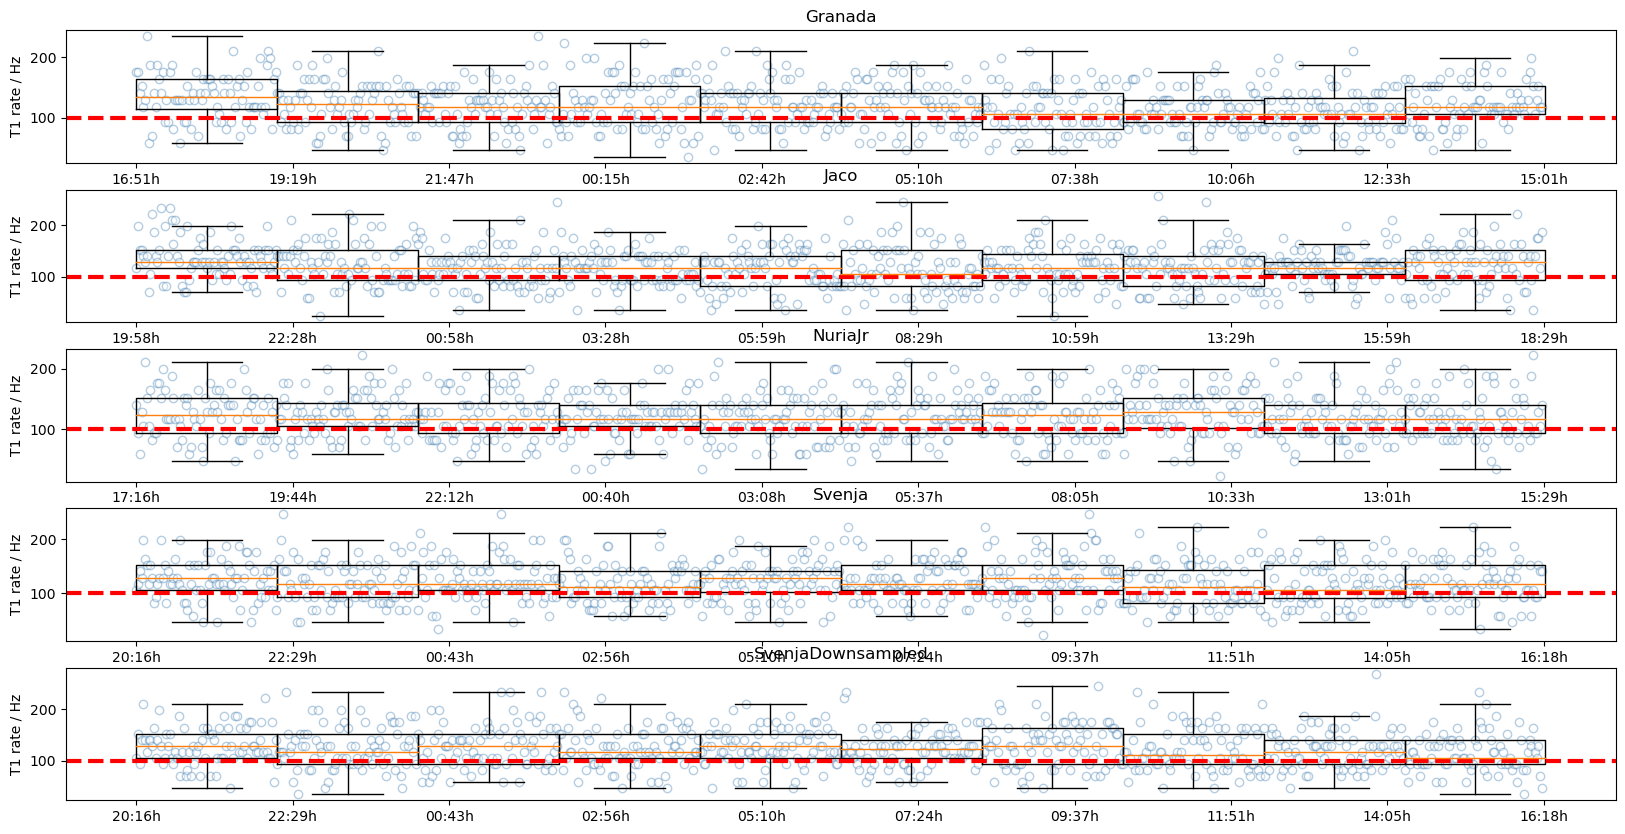

In [4]:
plt.rcParams['figure.figsize'] = [20,10]
fig, axes = plt.subplots(5, 1)

for ax, station in zip(axes, ['Granada', 'Jaco', 'NuriaJr', 'Svenja', 'SvenjaDownsampled']):
    violins = []

    root_path = f'/cr/tempdata01/filip/SSDCalib/WCDT1Calib/{station}/'
    for file in os.listdir(root_path):
        violins.append(sum(np.loadtxt(root_path + file)) / (8.33e-9 * 2048 * 5000))

    ax.scatter(range(len(violins)), violins, facecolor = 'white', edgecolors = "steelblue", alpha = 0.4)

    print(np.mean(violins), np.std(violins))
    
    combine = 80
    indices = np.arange(0, 799, combine)
    violins = np.split(np.array(violins), indices)
    positions = [combine] + [int(i + 0.5*combine) for i in indices]

    ax.boxplot(violins, positions = positions, widths = combine, showfliers = False)
    ax.axhline(100, c = "r", ls = "--", lw = 3)
    #_ = plt.violinplot(violins, range(50, 849, 100), vert = True, showmeans = True)
    ax.set_title(station)

    # timing information
    timestamps = np.loadtxt(f'/cr/tempdata01/filip/iRODS/UubRandoms/converted/timestamps/{station}.dat', dtype=str)
    start = int(timestamps[np.where(timestamps[:, 0] == "randoms0000.dat")[0][0]][1])
    stop = int(timestamps[np.where(timestamps[:, 0] == "randoms0799.dat")[0][0]][1])
    xticks = np.linspace(start, stop, 10)

    ax.set_ylabel('T1 rate / Hz')
    ax.set_xticks(np.linspace(0, len(os.listdir(root_path)), 10), [datetime.datetime.fromtimestamp(x).strftime("%H:%Mh") for x in xticks])